# Entendimiento de datos

In [1]:
!pip list 

Package                           Version
--------------------------------- ------------------
aiobotocore                       2.12.3
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-catalogs                 0.2.0
annotated-types                   0.6.0
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.3
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           6.1.3
astropy-iers-data                 0.2024.9.2.0.33.23
asttokens                         2.0.5
async-lru                         2.0.4
atomicwrites                      1.4.0
attrs                             23.1.0
Autom

Conjunto de datos utlizado: [CICIDS2017](https://www.unb.ca/cic/datasets/ids-2017.html)

In [ ]:
# Importaciones
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Utilidades

In [2]:
# Utilidades
seed=9603
proporcion_muestra = 0.0624811224473575 
carpetas = (
    "MachineLearningCVE",
    "TrafficLabelling"
)
archivos_csv = (
    "monday",
    "tuesday",
    "wednesday",
    "thursday_morning_webattacks",
    "thursday_afternoon_infilteration",
    "friday_morning",
    "friday_afternoon_portscan",
    "friday_afternoon_ddos",
)
output_paths = (
    "output/",
    "../3_preparacion_de_datos/DB/"
)

In [7]:
# getFrequency(): Función para obtener la distribución de frecuencias de la columna label
def getFrequency(df, caracteristica) :
  frecuencia = df[caracteristica].value_counts()
  porcentaje = df[caracteristica].value_counts(normalize=True) * 100

  tabla_frecuencia = pd.DataFrame({
    "Frecuencia": frecuencia,
    "Frecuencia(%)": porcentaje
  })
  
  tabla_frecuencia["Frecuencia(%)"].round(2)
  
  print(tabla_frecuencia)

In [8]:
# generateBoxplot(): Función para generar boxplot 
def generateBoxplot(x, y, data, save_path) :
  sns.boxplot(x=x, y=y, data=data)

  plt.xlabel(x)
  plt.ylabel(y)
  plt.savefig(save_path)
  plt.show()

In [9]:
# generateCorrMatrix(): Función para generar matriz de correlación
def generateCorrMatrix(data, save_path, title="Matriz de correlación", method="pearson", decimals=2) :
  # Generación de matriz de correlación
  matriz_correlacion = data.corr(method=method).round(decimals=decimals)

  # Generación de mapa de calor para visualizar los datos
  plt.figure(figsize=(52, 39))

  sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
  plt.title(title)
  plt.savefig(save_path)
  plt.show()

In [10]:
# Arrays según el tipo de característica
caracteristicas_nominales = ['destination_port', 'label']

caracteristicas_binarias  = [
      'fwd_psh_flags', 'fwd_urg_flags',
      'fin_flag_count', 'syn_flag_count', 'rst_flag_count', 
      'psh_flag_count', 'ack_flag_count', 'urg_flag_count', 
      'cwe_flag_count', 'ece_flag_count'
]
      
caracteristicas_numericas = [
      'flow_duration', 'total_fwd_packets', 'total_backward_packets', 
      'total_length_of_fwd_packets', 'total_length_of_bwd_packets', 
      'fwd_packet_length_max', 'fwd_packet_length_min', 
      'fwd_packet_length_mean', 'fwd_packet_length_std', 
      'bwd_packet_length_max', 'bwd_packet_length_min', 
      'bwd_packet_length_mean', 'bwd_packet_length_std', 
      'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 
      'flow_iat_min', 'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 
      'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 
      'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min', 'fwd_header_length', 
      'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
      'min_packet_length', 'max_packet_length', 'packet_length_mean',
      'packet_length_std', 'packet_length_variance', 'down/up_ratio',
      'average_packet_size', 'avg_fwd_segment_size', 
      'avg_bwd_segment_size', 'fwd_header_length.1', 'subflow_fwd_packets', 
      'subflow_fwd_bytes', 'subflow_bwd_packets', 'subflow_bwd_bytes', 
      'init_win_bytes_forward', 'init_win_bytes_backward', 
      'act_data_pkt_fwd', 'min_seg_size_forward', 'active_mean', 
      'active_std', 'active_max', 'active_min', 'idle_mean', 'idle_std', 
      'idle_max', 'idle_min'
]

caracteristicas_no_utiles = [
      'bwd_psh_flags',
      'bwd_urg_flags', 
      'fwd_avg_bytes/bulk', 'fwd_avg_packets/bulk', 'fwd_avg_bulk_rate', 
      'bwd_avg_bytes/bulk', 'bwd_avg_packets/bulk', 'bwd_avg_bulk_rate'
]

caracteristicas_con_valor_maximo_infinito = [
      'flow_bytes/s', 'flow_packets/s'
]

## Recopilación de datos iniciales - Carga de datos

In [2]:
# Cargando datos
df = pd.concat(
    [pd.read_csv(f"DB/{carpetas[0]}/{i}.csv", sep=",") for i in archivos_csv],
    ignore_index=True
)

print("Datos cargados")

NameError: name 'pd' is not defined

In [ ]:
df_vector, df_temp = train_test_split(
  df,
  test_size=1-0.0624811224473575,
  stratify=df[" Label"],
  random_state=seed
)
getFrequency(df_vector, " Label")

                            Frecuencia  Frecuencia(%)
 Label                                               
BENIGN                          142026      80.300563
DoS Hulk                         14438       8.163150
PortScan                          9930       5.614356
DDoS                              7999       4.522582
DoS GoldenEye                      643       0.363548
FTP-Patator                        496       0.280435
SSH-Patator                        368       0.208065
DoS slowloris                      362       0.204672
DoS Slowhttptest                   344       0.194495
Bot                                123       0.069543
Web Attack � Brute Force            94       0.053147
Web Attack � XSS                    41       0.023181
Infiltration                         2       0.001131
Web Attack � Sql Injection           1       0.000565
Heartbleed                           1       0.000565


In [ ]:
df_vector = df_vector[~df_vector[" Label"].isin(["Infiltration","Web Attack � Sql Injection","Heartbleed"])]

df_train, df_test = train_test_split(
  df_vector,
  test_size=0.2,
  stratify=df_vector[" Label"],
  random_state=seed
) 

getFrequency(df_train, " Label")
getFrequency(df_test, " Label")

                          Frecuencia  Frecuencia(%)
 Label                                             
BENIGN                        113621      80.302634
DoS Hulk                       11550       8.163063
PortScan                        7944       5.614491
DDoS                            6399       4.522549
DoS GoldenEye                    514       0.363274
FTP-Patator                      397       0.280583
SSH-Patator                      294       0.207787
DoS slowloris                    290       0.204960
DoS Slowhttptest                 275       0.194359
Bot                               99       0.069969
Web Attack � Brute Force          75       0.053007
Web Attack � XSS                  33       0.023323
                          Frecuencia  Frecuencia(%)
 Label                                             
BENIGN                         28405      80.301360
DoS Hulk                        2888       8.164419
PortScan                        1986       5.614452
DDoS        

In [ ]:
# Guardar en carpeta output
for i in output_paths : 
  df_train.to_csv(f"{i}df_train.csv", index=False)
  df_test.to_csv(f"{i}df_test.csv", index=False)
print("Guardado")

Guardado


Para agilizar el análisis, en principio, transformaremos las columnas del dataframe y las etiquetas de la columna label a un formato más fácil de recordar y digitar

In [ ]:
# Transformación de nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
print(df.columns)
print(f"Total de características: {len(df.columns)}")

Index(['destination_port', 'flow_duration', 'total_fwd_packets',
       'total_backward_packets', 'total_length_of_fwd_packets',
       'total_length_of_bwd_packets', 'fwd_packet_length_max',
       'fwd_packet_length_min', 'fwd_packet_length_mean',
       'fwd_packet_length_std', 'bwd_packet_length_max',
       'bwd_packet_length_min', 'bwd_packet_length_mean',
       'bwd_packet_length_std', 'flow_bytes/s', 'flow_packets/s',
       'flow_iat_mean', 'flow_iat_std', 'flow_iat_max', 'flow_iat_min',
       'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std', 'fwd_iat_max',
       'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean', 'bwd_iat_std',
       'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags', 'bwd_psh_flags',
       'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
       'packet_length_std', 'packet_length_variance', 'fin_flag_count',
       'syn_flag_co

In [ ]:
# Transformación de nombres de etiquetas de la columna label
df["label"] = df["label"].str.upper().str.replace("� ", "").str.replace(" ", "_").str.replace("-", "_")
print(df["label"].unique())
print(f"Total de etiquetas: {len(df["label"].unique())}")

['BENIGN' 'FTP_PATATOR' 'SSH_PATATOR' 'DOS_SLOWLORIS' 'DOS_SLOWHTTPTEST'
 'DOS_HULK' 'DOS_GOLDENEYE' 'HEARTBLEED' 'WEB_ATTACK_BRUTE_FORCE'
 'WEB_ATTACK_XSS' 'WEB_ATTACK_SQL_INJECTION' 'INFILTRATION' 'BOT'
 'PORTSCAN' 'DDOS']
Total de etiquetas: 15


## Descripción de datos

El conjunto de datos recopilado utilizó un transformador para convertir todo el tráfico de red en segmentos que resumen la comunicación entre máquina destino y máquina de origen de un formato ".pcap" a ".csv". Este transformador es llamado "CICFlowMeter" o "ISCXFlowMeter" y es utilizado por varios estudios que generan bases de datos útiles para realizar proyectos de ciencia de datos y Machine Learning. El transformador fue programado en el lenguaje Java.

Transformador: [CICFlowMeter]()

### 1. Tipos de datos recolectados

|Tipo|Descripción|
|-|-|
|Flujo|Segmento de red dedicado a la comunicación entre un computador y otro|
|packets|Paquetes envíados durante el flujo|
|IAT|Inter-Arrival Time: tiempo entre la llegada de un paquete y el envío de otro|
|active|Tiempo en el que se están intercambiando paquetes, se considera que está activo el flujo|
|Idle|Tiempo de inactividad en un flujo|
|Subflujo|Segmento del flujo principal que puede surgir cuando hay una interrupción, cortes de actividadm timeouts o solicitudes de reconexión|

### 2. Descripción de características

Existen características a las que se puede identificar cierta relación respecto a la descripción de la característica, sin embargo, su principal diferencia es respecto a la dirección de los datos, ya que en un subflujo existe comunicación de origen a destino (Forward) y de destino a origen (Backward), CICFlowMeter recopila características útiles usando este tipo de enfoque.

A continuación, se describen las características en el dataset.

|Forward|Backward|Tipo de característica|Descripción|
|-|-|-|-|
|total Fwd Packet           |total Bwd packets          |Numérica |Total de paquetes envíados durante el flujo en dirección de bwd/fwd      |
|total Length of Fwd Packet |total Length of Bwd Packet |Numérica |Tamaño total de paquete envíado en dirección de bwd/fwd                  |
|Fwd Packet Length Max      |Bwd Packet Length Max      |Numérica |Tamaño máximo de paquete envíado en dirección de bwd/fwd                 |
|Fwd Packet Length Min      |Bwd Packet Length Min      |Numérica |Tamaño mínimo de paquete envíado e dirección de bwd/fwd                  |
|Fwd Packet Length Mean     |Bwd Packet Length Mean     |Numérica |Tamaño medio de paquete envíado e dirección de bwd/fwd                   |
|Fwd Packet Length Std      |Bwd Packet Length Std      |Numérica |Desviación estándar del tamaño de paquete envíado e dirección de bwd/fwd |
|Fwd IAT Total              |Bwd IAT Total              |Numérica |IAT total en dirección de bwd/fwd                                        |
|Fwd IAT Mean               |Bwd IAT Mean               |Numérica |IAT medio en dirección de bwd/fwd                                        |
|Fwd IAT Std                |Bwd IAT Std                |Numérica |Desviación estándar de IAT en dirección de bwd/fwd                       |
|Fwd IAT Max                |Bwd IAT Max                |Numérica |IAT máximo en dirección de bwd/fwd                                       |
|Fwd IAT Min                |Bwd IAT Min                |Numérica |IAT mínimo en dirección de bwd/fwd                                       |
|Fwd PSH flags              |Bwd PSH Flags              |Binaria  |                                                                         |
|Fwd URG Flags              |Bwd URG Flags              |Binaria  |                                                                         |
|Fwd Header Length          |Bwd Header Length          |Numérica |Tamaño total de las cabeceras en bytes en dirección bwd/fwd              |
|FWD Packets/s              |Bwd Packets/s              |Numérica |Números de paquetes por segundo en dirección bwd/fw                      |
|Fwd Segment Size Avg       |Bwd Segment Size Avg       |Numérica |Tamaño promedio de segmentos TCP en el flujo en dirección bwd/fwd        |
|Fwd Bytes/Bulk Avg         |Bwd Bytes/Bulk Avg         |         |                                                                         |
|Fwd Packet/Bulk Avg        |Bwd Packet/Bulk Avg        |         |                                                                         |
|Fwd Bulk Rate Avg          |Bwd Bulk Rate Avg          |         |                                                                         |
|Subflow Fwd Packets        |Subflow Bwd Packets        |Numérica |Número de paquetes enviados en un subflujo de paquete                    |
|Subflow Fwd Bytes          |Subflow Bwd Bytes          |Numérica |Número de bytes enviados en un subflujo de paquetes                      |
|Fwd Init Win bytes         |Bwd Init Win bytes         |Numérica |Respuesta de tamaño en bytes que puede recibir como respuesta            |
|Fwd Act Data Pkts          |                           |Numérica |Recuento de paquetes con mínimo 1 byte de payload de en la dirección fwd |
|Fwd Seg Size Min           |                           |Numérica |Tamaño mínimo de segmento TCP observado en dirección fwd                 |


|Característica|Tipo de característica|Descripción|
|-|-|-|
|Flow Bytes/s           |Numérica |Número de bytes en un flujo por segundo                        |
|Flow Packets/s         |Numérica |Número de paquetes en un flujo por segundo                     |
|Flow IAT Mean          |Numérica |IAT medio dentro de un flujo                                   |
|Flow IAT Std           |Numérica |Desviación estándar del IAT dentro de un flujo                 |
|Flow IAT Max           |Numérica |IAT máximo dentro de un flujo                                  |
|Flow IAT Min           |Numérica |IAT mínimo dentro de un flujo                                  |
|Packet Length Min      |Numérica |Tamaño mínimo de paquetes dentro de un flujo                   |
|Packet Length Max      |Numérica |Tamaño máximo de paquetes dentro de un flujo                   |
|Packet Length Mean     |Numérica |Tamaño medio de paquetes dentro de un flujo                    |
|Packet Length Std      |Numérica |Desviación estándar del tamaño de paquetes dentro de un flujo  |
|Packet Length Variance |Numérica |Varianza del tamaño de paquetes dentro de un flujo             |
|FIN Flag Count         |Binaria  |                                                               |
|SYN Flag Count         |Binaria  |                                                               |
|RST Flag Count         |Binaria  |                                                               |
|PSH Flag Count         |Binaria  |                                                               |
|ACK Flag Count         |Binaria  |                                                               |
|URG Flag Count         |Binaria  |                                                               |
|CWR Flag Count         |Binaria  |                                                               |
|ECE Flag Count         |Binaria  |                                                               |
|down/Up Ratio          |Numérica |Ratio de carga y descarga                                      |
|Average Packet Size    |Numérica |Tamaño promedio de paquetes en un flujo                        |
|Active Mean            |Numérica |Tiempo activo medio                                            |
|Active Std             |Numérica |Desviación estándar del tiempo activo                          |
|Active Max             |Numérica |Máximo tiempo activo                                           |
|Active Min             |Numérica |Mínimo tiempo activo                                           |
|Idle Mean              |Numérica |Idle medio en un flujo                                         |
|Idle Std               |Numérica |Desviación estándar del Idle en un flujo                       |
|Idle Max               |Numérica |Idle máximo en un flujo                                        |
|Idle Min               |Numérica |Idle mínimo en un flujo                                        |
|destination_port       |Nominal  |Puerto de destino                                              |
|label                  |Nominal  |variable objetivo (Tipo de ciberataque)                        |

### 3. Distribución de datos

In [8]:
# Visualización de características y tipo de datos
distribucion = df.shape
print(f"""
N° registros: {distribucion[0]}
N° características: {distribucion[1]}
""")
print(f"""
{df.dtypes.head(40)}
{df.dtypes.tail(40)}
""")


N° registros: 2830743
N° características: 79


destination_port                 int64
flow_duration                    int64
total_fwd_packets                int64
total_backward_packets           int64
total_length_of_fwd_packets      int64
total_length_of_bwd_packets      int64
fwd_packet_length_max            int64
fwd_packet_length_min            int64
fwd_packet_length_mean         float64
fwd_packet_length_std          float64
bwd_packet_length_max            int64
bwd_packet_length_min            int64
bwd_packet_length_mean         float64
bwd_packet_length_std          float64
flow_bytes/s                   float64
flow_packets/s                 float64
flow_iat_mean                  float64
flow_iat_std                   float64
flow_iat_max                     int64
flow_iat_min                     int64
fwd_iat_total                    int64
fwd_iat_mean                   float64
fwd_iat_std                    float64
fwd_iat_max                      int64
fwd_iat_min     

## Exploración de datos

### 1. Variable objetivo: label

In [ ]:
# Tabla de frecuencia de tipos de ciberataques
getFrequency(df, "label")

                          Frecuencia  Frecuencia(%)
label                                              
BENIGN                       2273097      80.300366
DOS_HULK                      231073       8.162981
PORTSCAN                      158930       5.614427
DDOS                          128027       4.522735
DOS_GOLDENEYE                  10293       0.363615
FTP_PATATOR                     7938       0.280421
SSH_PATATOR                     5897       0.208320
DOS_SLOWLORIS                   5796       0.204752
DOS_SLOWHTTPTEST                5499       0.194260
BOT                             1966       0.069452
WEB_ATTACK_BRUTE_FORCE          1507       0.053237
WEB_ATTACK_XSS                   652       0.023033
INFILTRATION                      36       0.001272
WEB_ATTACK_SQL_INJECTION          21       0.000742
HEARTBLEED                        11       0.000389


### 2. Distribución de datos

In [14]:
# Características numéricas
for i in caracteristicas_numericas : 
  print(f"""
  Característica: {i}
{df[i].describe()}
""")


  Característica: flow_duration
count    2.830743e+06
mean     1.478566e+07
std      3.365374e+07
min     -1.300000e+01
25%      1.550000e+02
50%      3.131600e+04
75%      3.204828e+06
max      1.200000e+08
Name: flow_duration, dtype: float64


  Característica: total_fwd_packets
count    2.830743e+06
mean     9.361160e+00
std      7.496728e+02
min      1.000000e+00
25%      2.000000e+00
50%      2.000000e+00
75%      5.000000e+00
max      2.197590e+05
Name: total_fwd_packets, dtype: float64


  Característica: total_backward_packets
count    2.830743e+06
mean     1.039377e+01
std      9.973883e+02
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      2.919220e+05
Name: total_backward_packets, dtype: float64


  Característica: total_length_of_fwd_packets
count    2.830743e+06
mean     5.493024e+02
std      9.993589e+03
min      0.000000e+00
25%      1.200000e+01
50%      6.200000e+01
75%      1.870000e+02
max      1.290000e+07
Name: total_l

In [15]:
# Características sin datos para análisis
for i in caracteristicas_no_utiles : 
  print(f"""
  Característica: {i}
{df[i].describe()}
""")


  Característica: bwd_psh_flags
count    2830743.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: bwd_psh_flags, dtype: float64


  Característica: bwd_urg_flags
count    2830743.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: bwd_urg_flags, dtype: float64


  Característica: fwd_avg_bytes/bulk
count    2830743.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: fwd_avg_bytes/bulk, dtype: float64


  Característica: fwd_avg_packets/bulk
count    2830743.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: fwd_avg_packets/bulk, dtype: float64


  Característica: fwd_avg_bulk_rate
count    2830743.0
mean           0.0
std          

In [16]:
# Características con valores máximos en infinito, es necesario realizar una transformación
for i in caracteristicas_con_valor_maximo_infinito : 
  print(f"""
  Característica: {i}
{df[i].describe()}
""")


  Característica: flow_bytes/s
count    2.829385e+06
mean              inf
std               NaN
min     -2.610000e+08
25%      1.193197e+02
50%      4.595549e+03
75%      1.666667e+05
max               inf
Name: flow_bytes/s, dtype: float64


  Característica: flow_packets/s
count    2.830743e+06
mean              inf
std               NaN
min     -2.000000e+06
25%      3.446226e+00
50%      1.106684e+02
75%      2.325581e+04
max               inf
Name: flow_packets/s, dtype: float64



### 3. Visualización de datos

#### 3.1. Boxplots de características numéricas

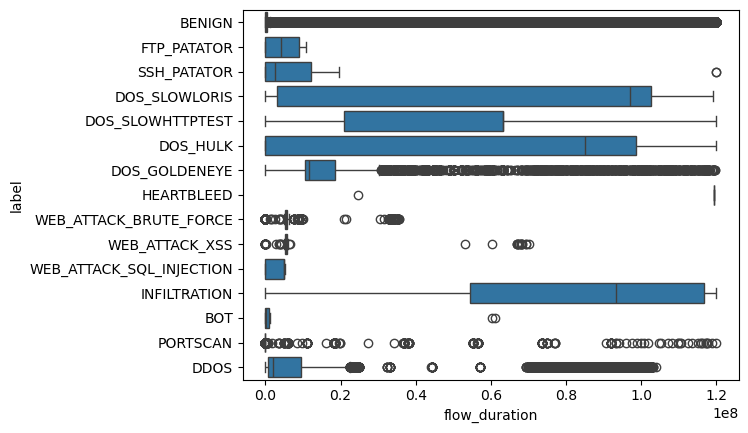

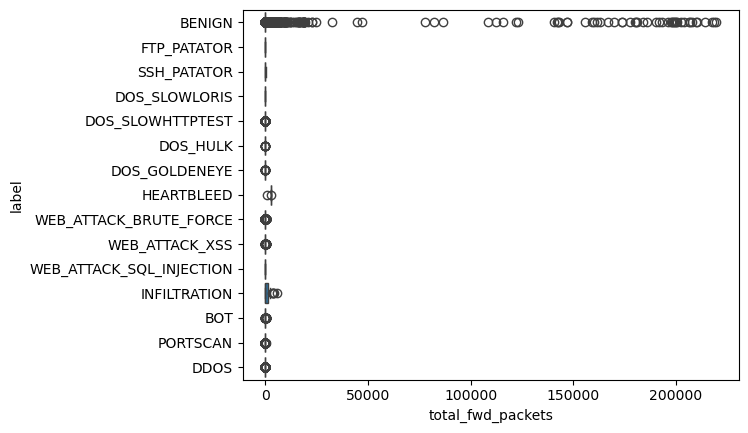

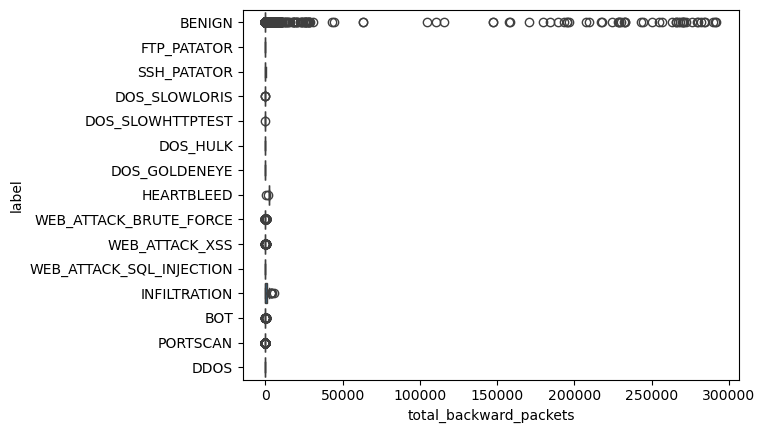

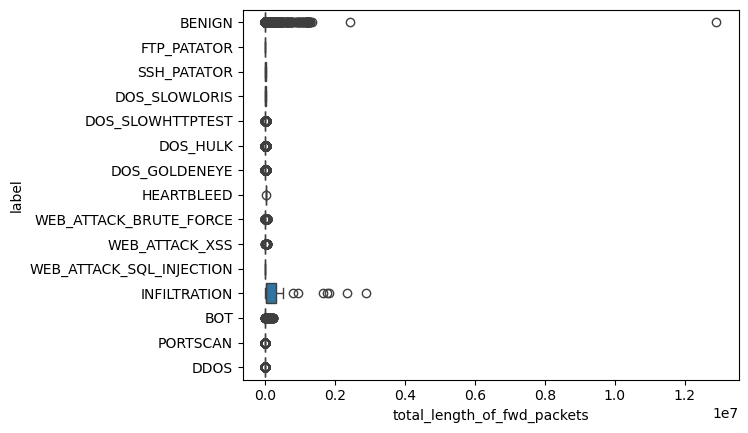

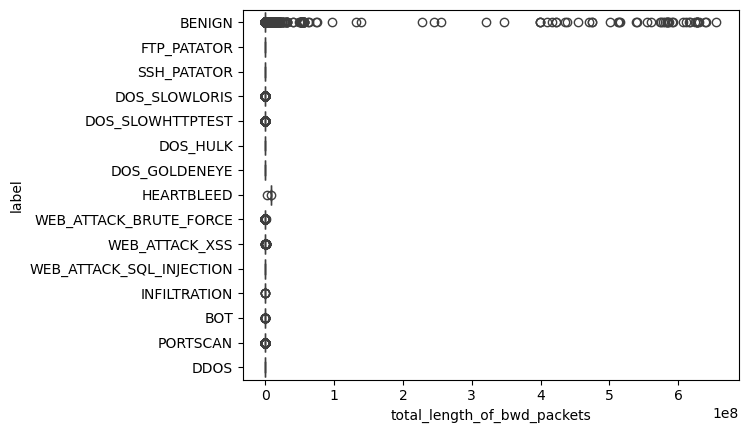

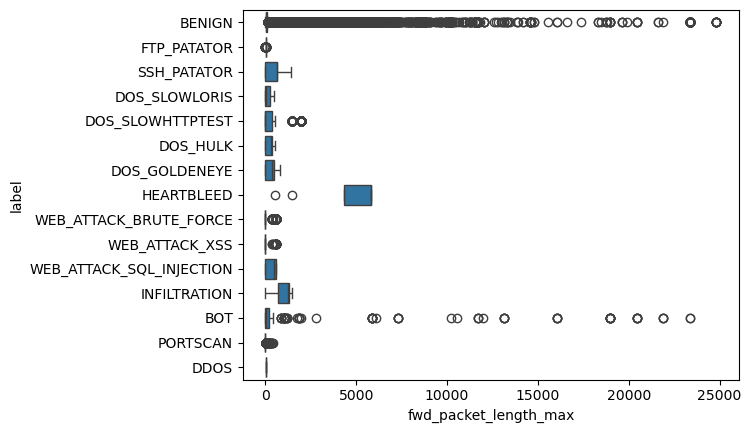

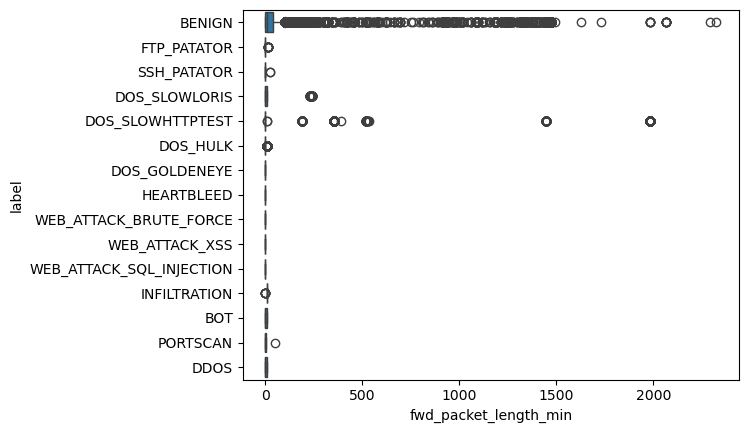

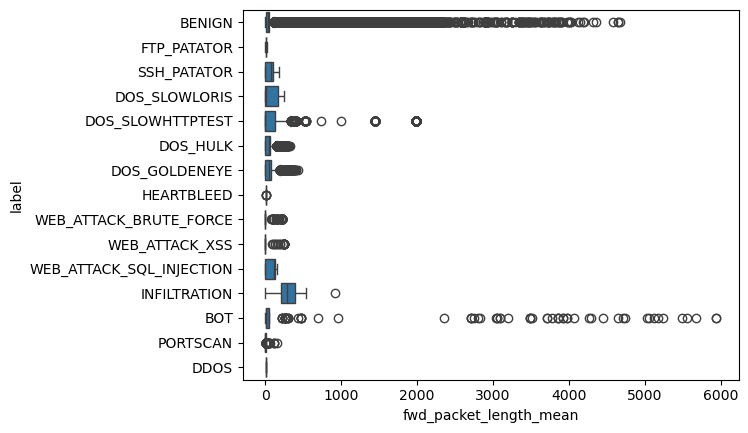

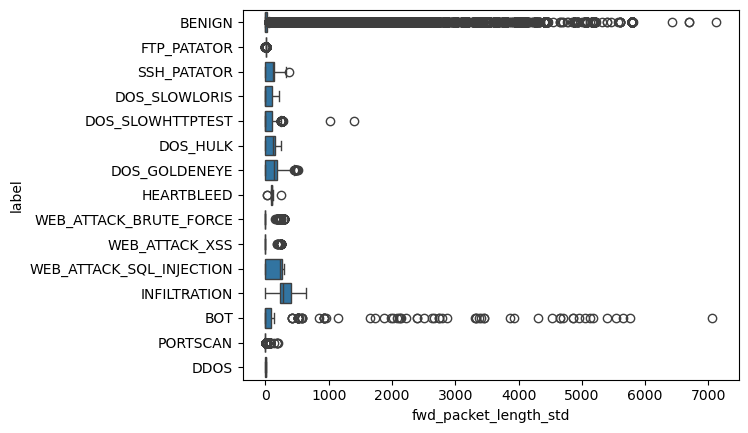

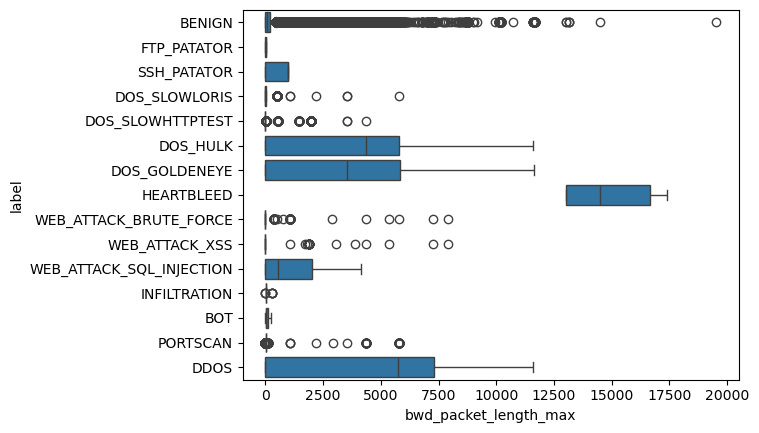

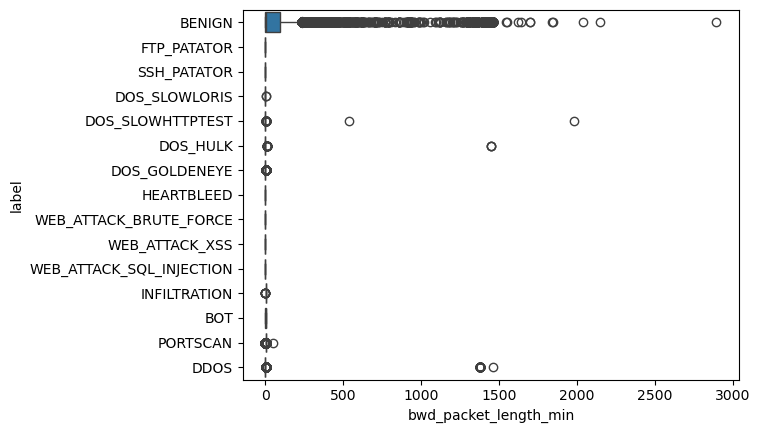

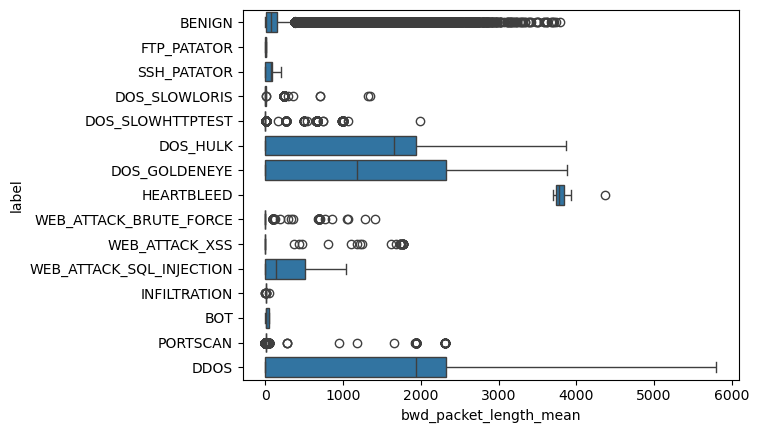

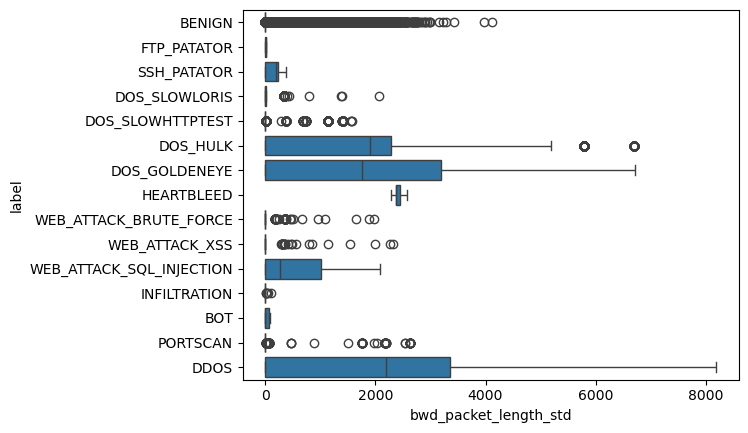

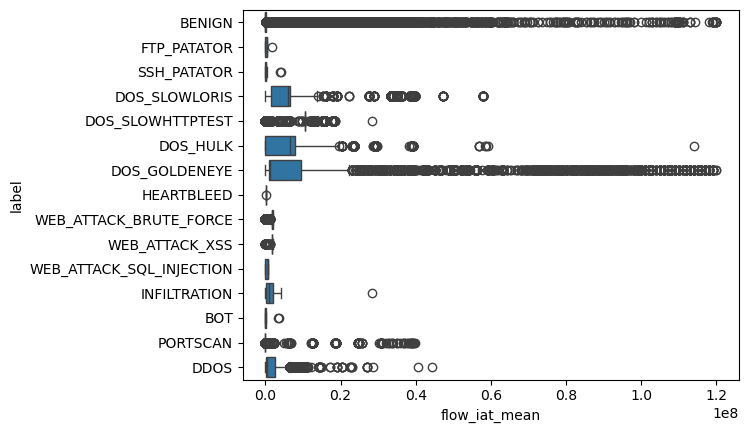

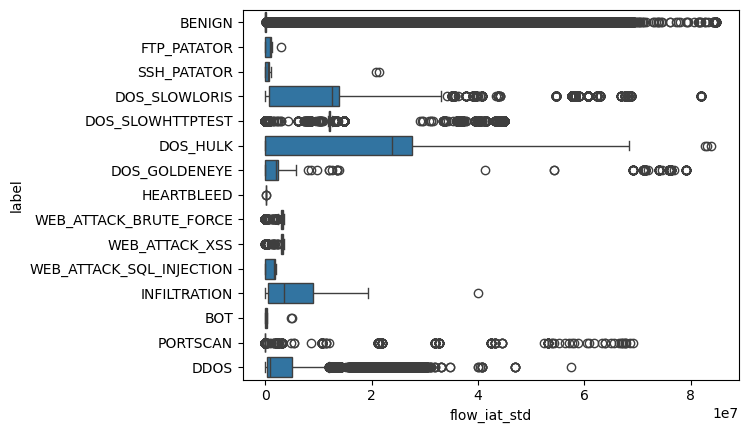

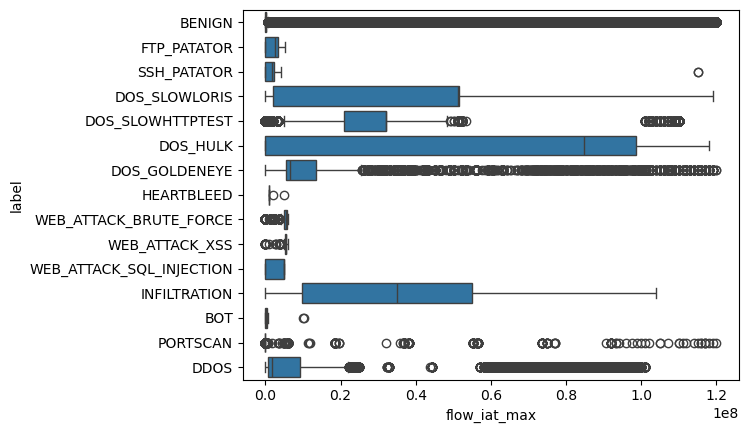

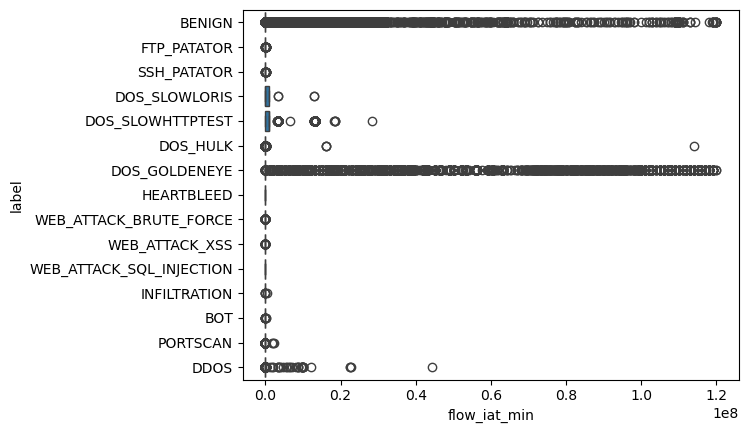

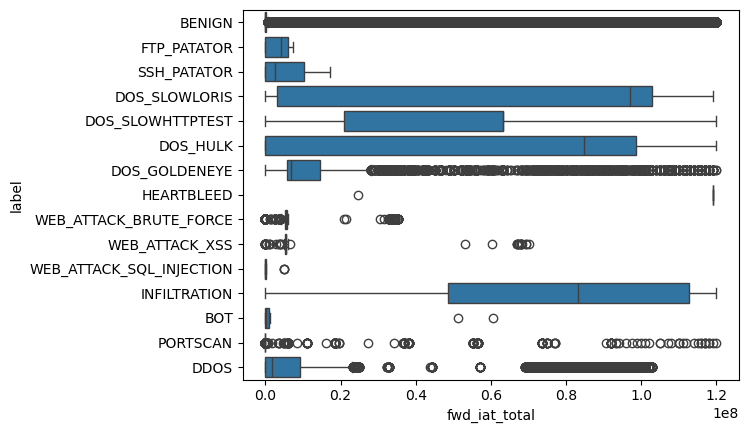

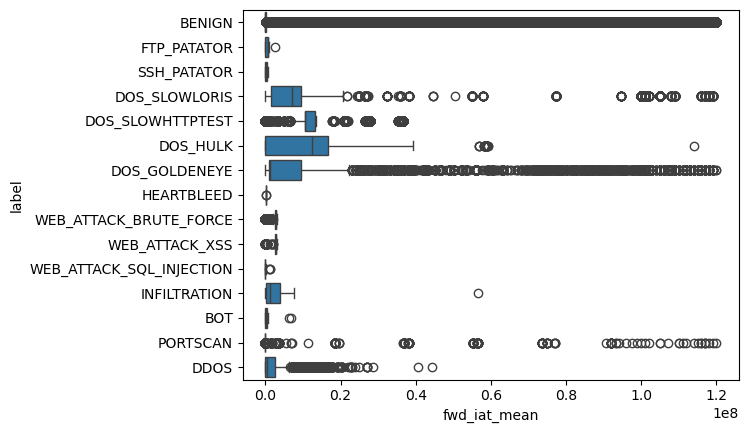

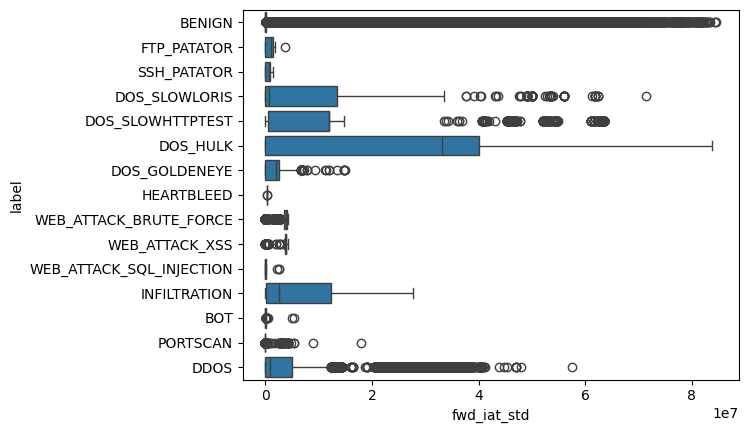

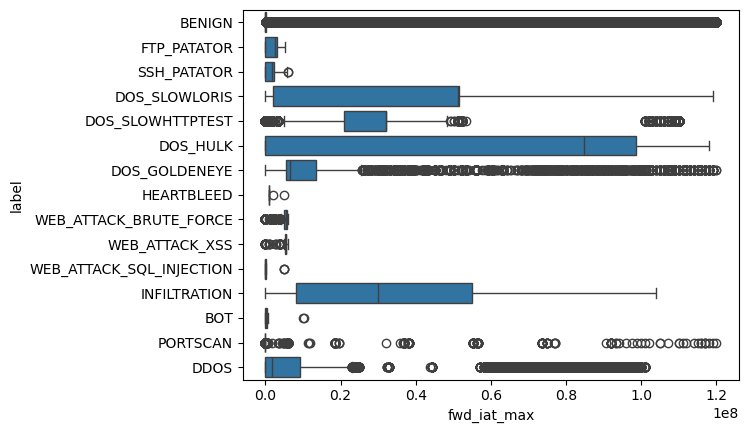

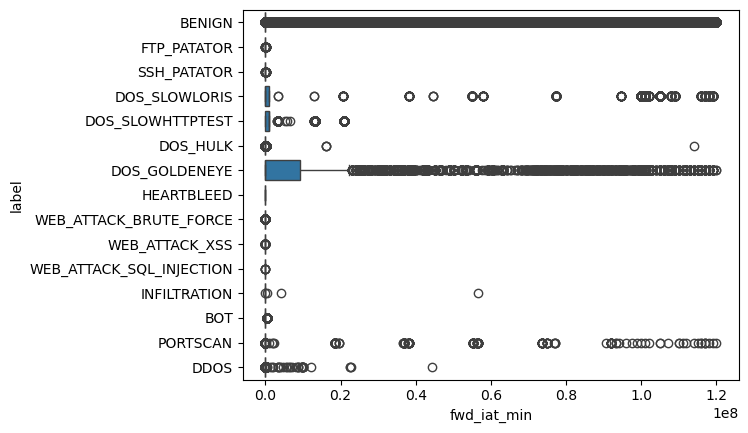

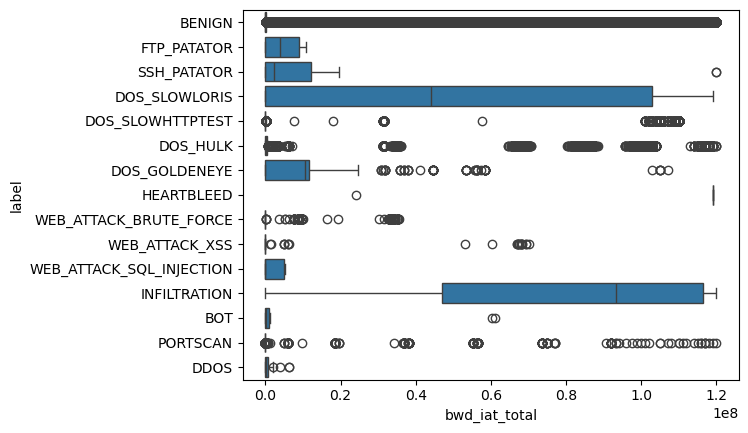

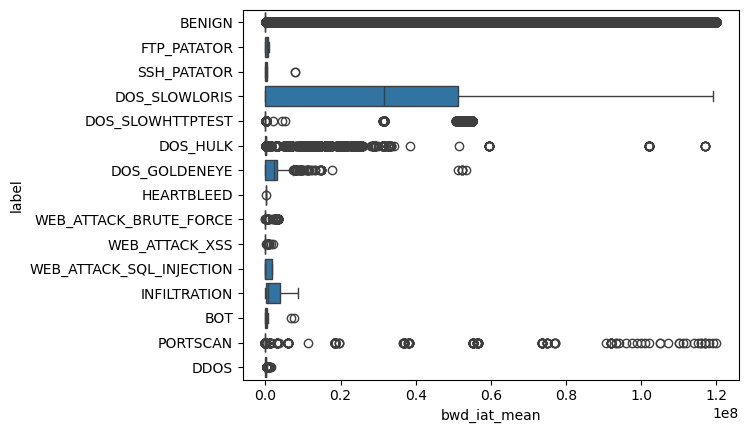

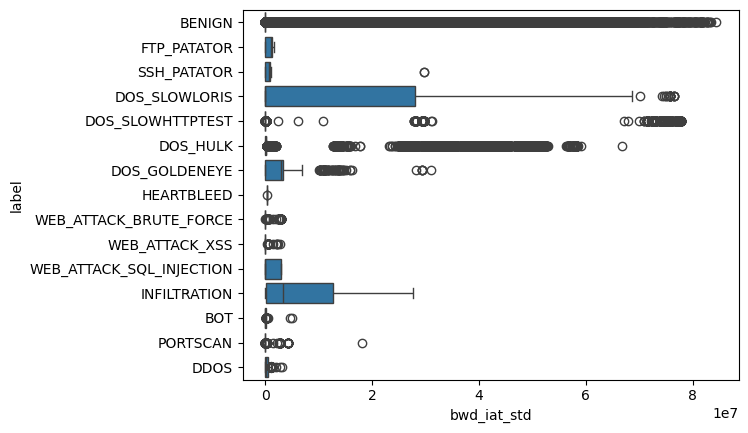

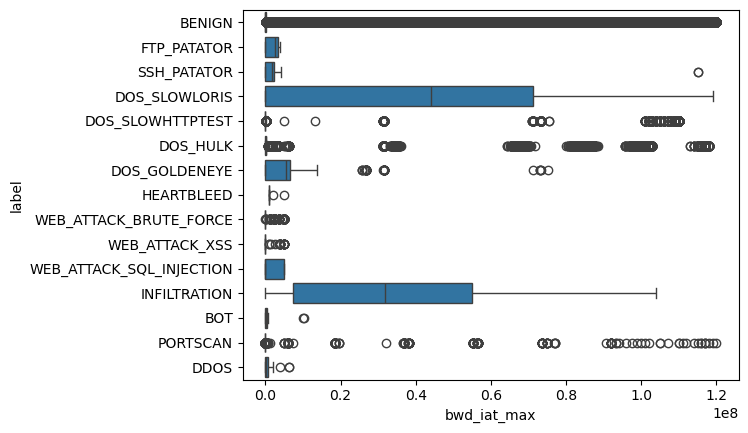

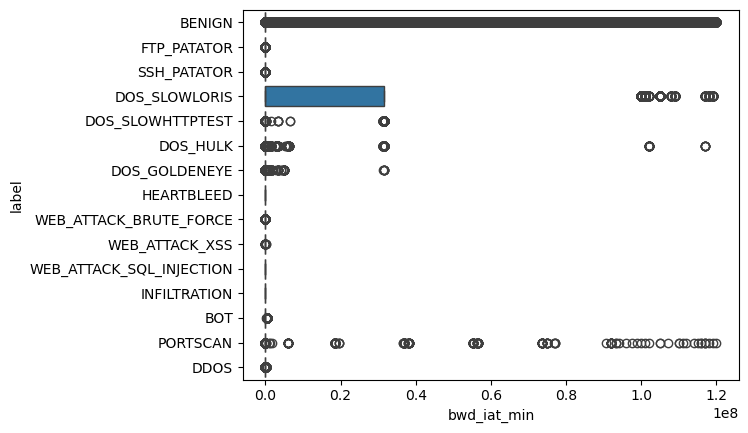

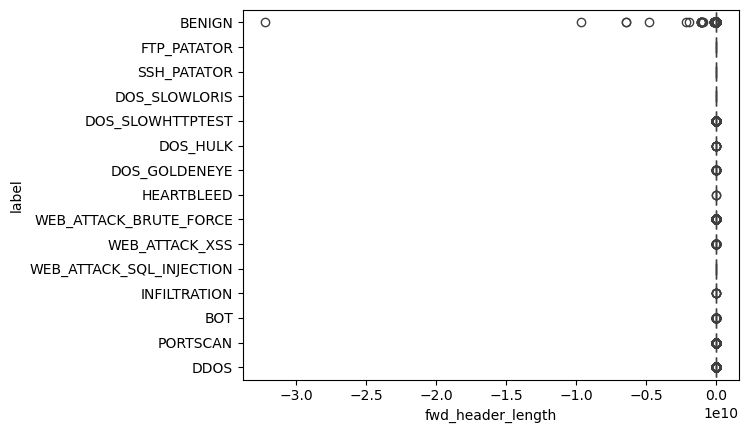

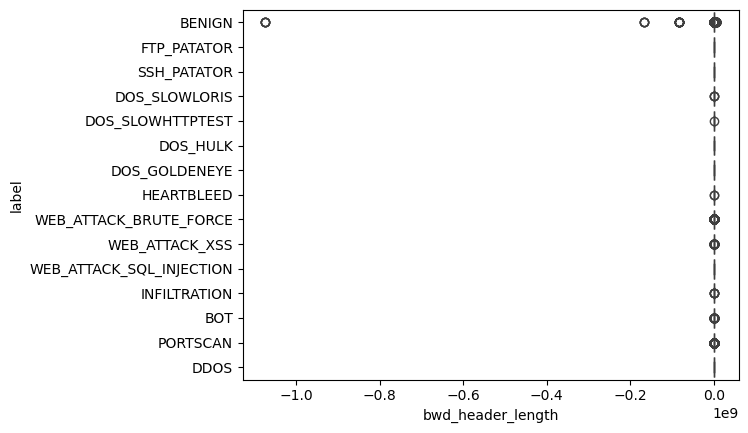

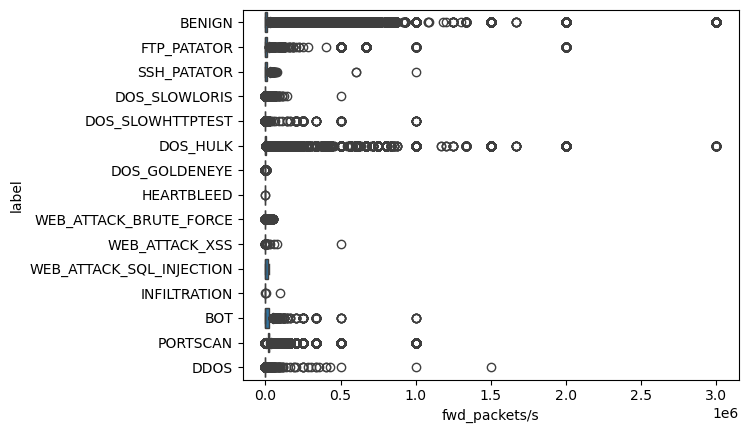

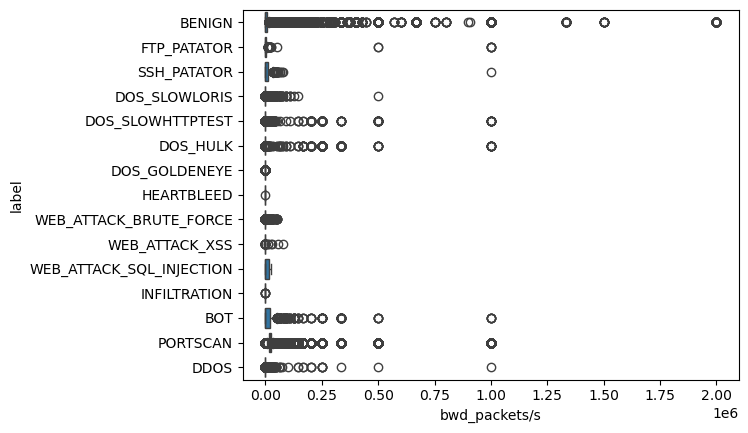

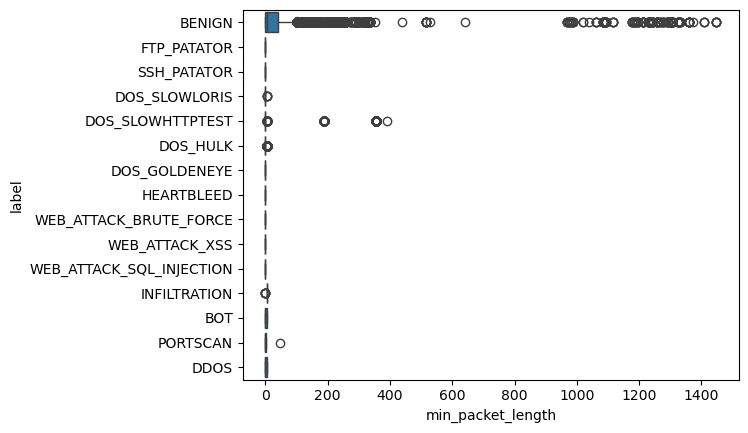

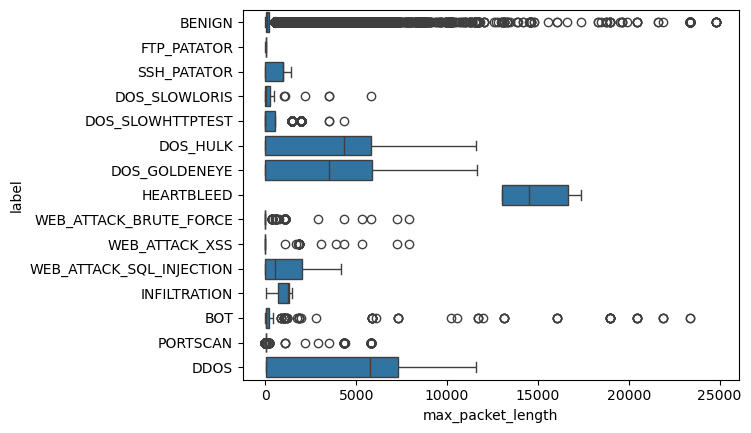

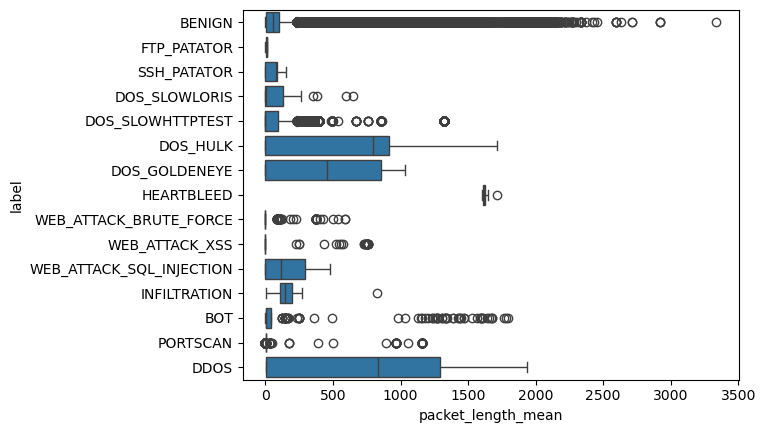

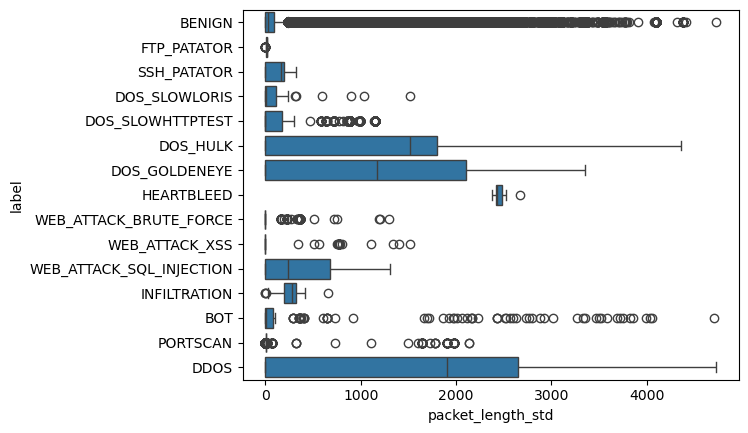

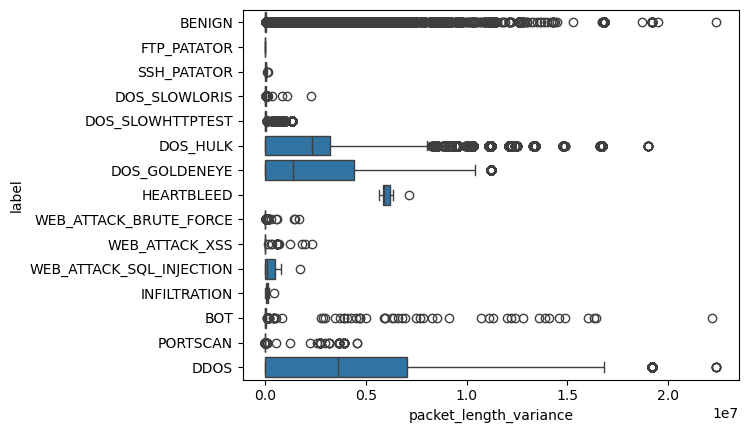

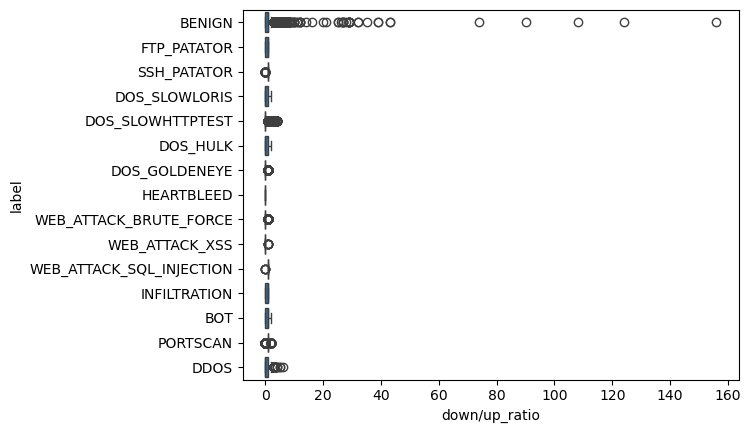

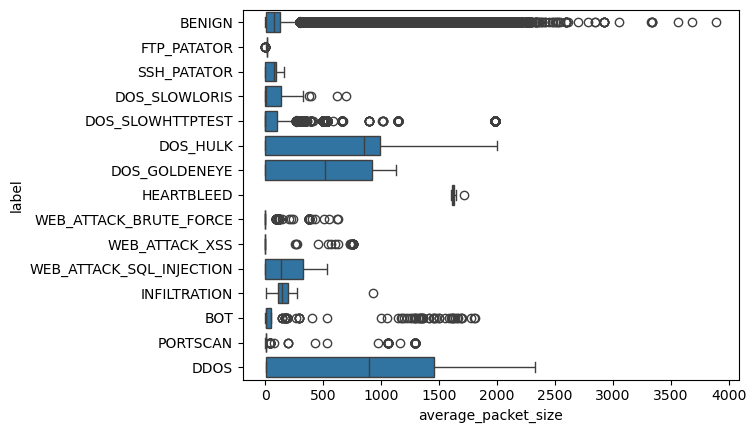

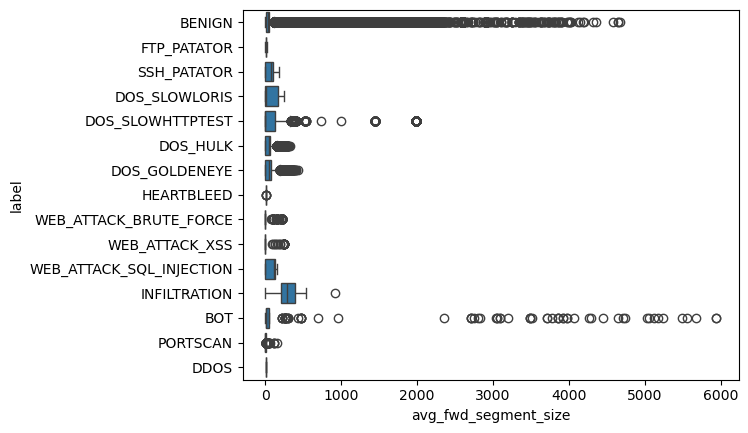

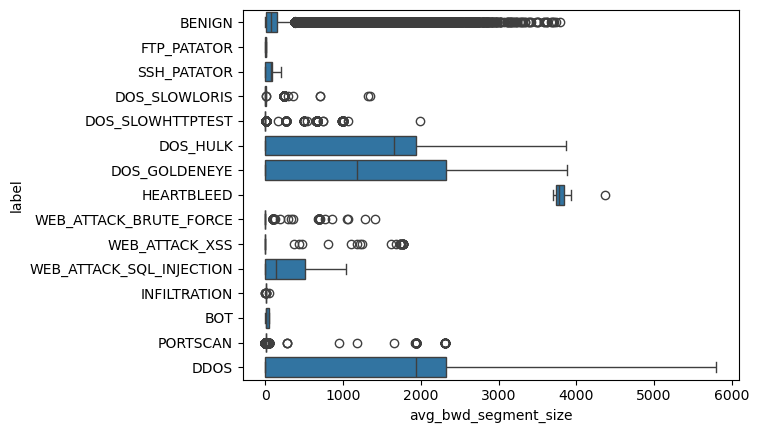

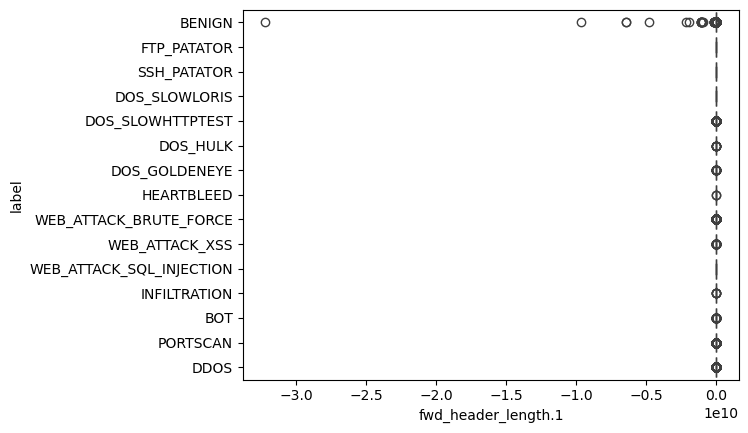

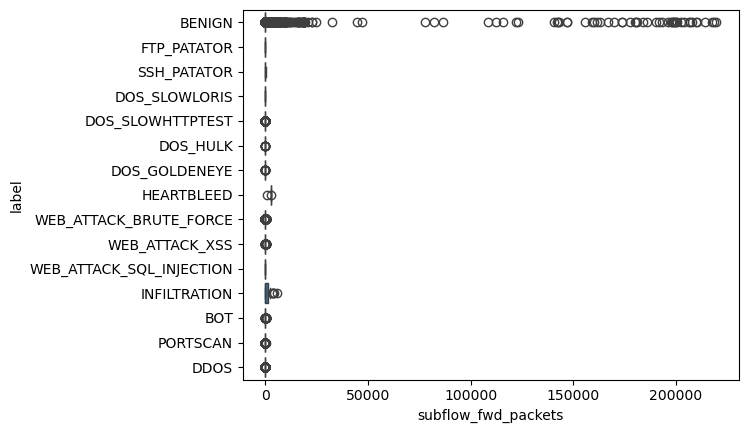

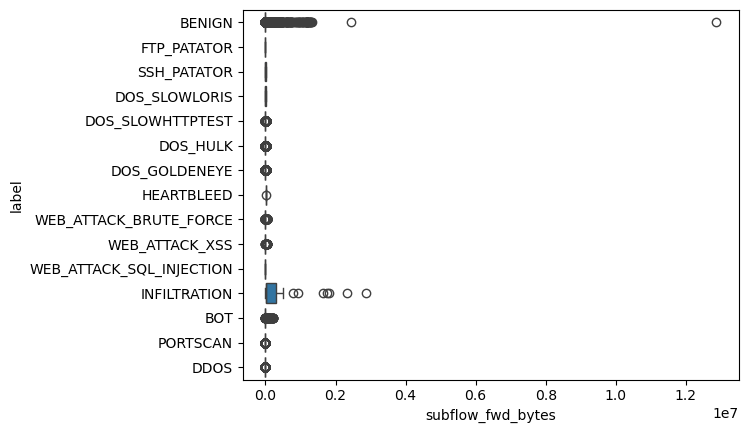

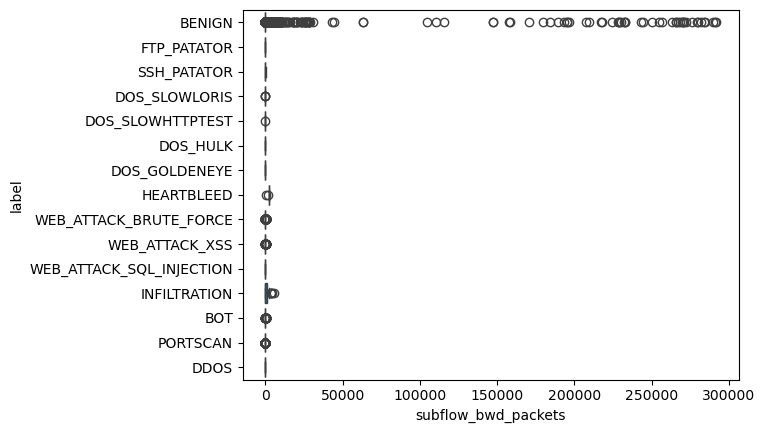

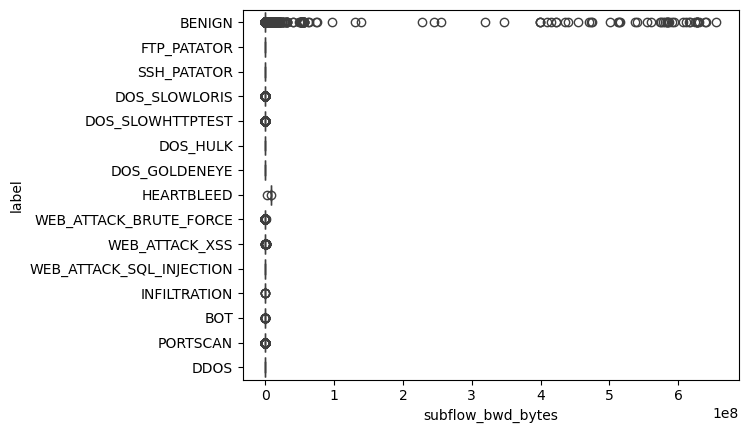

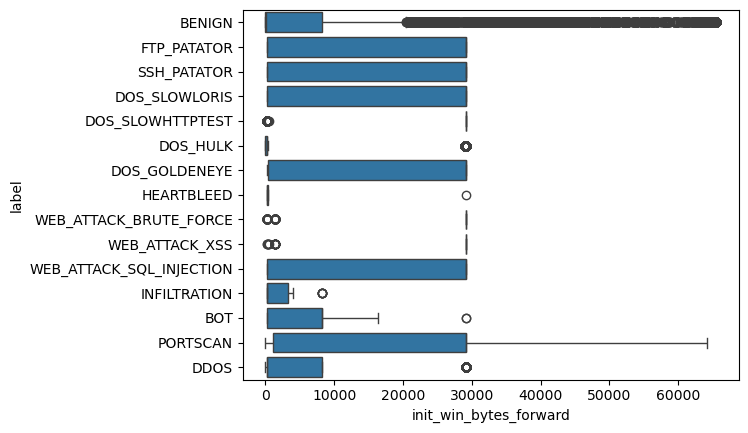

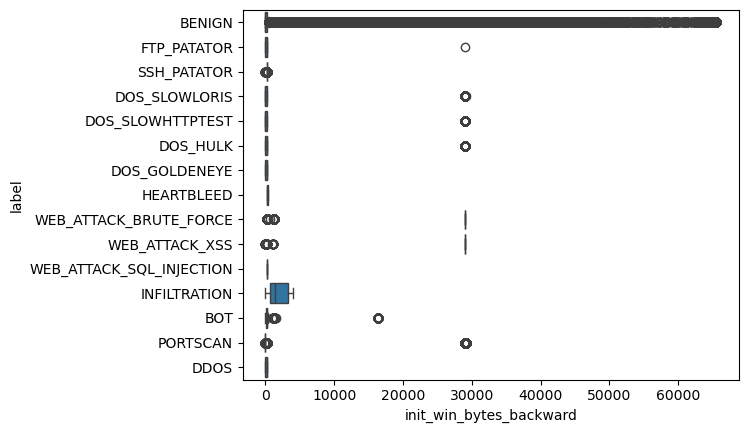

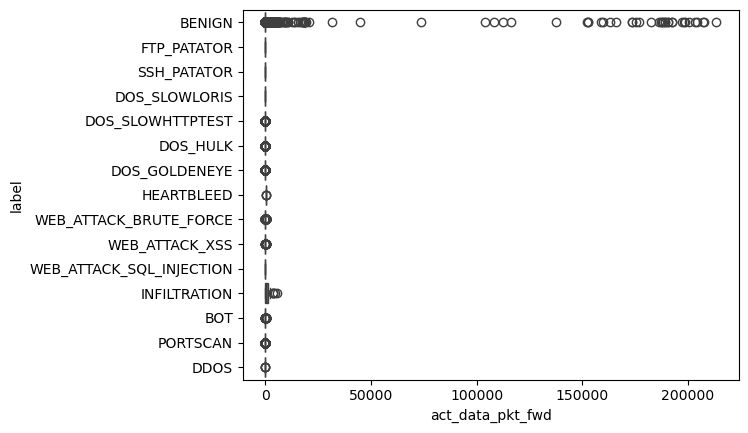

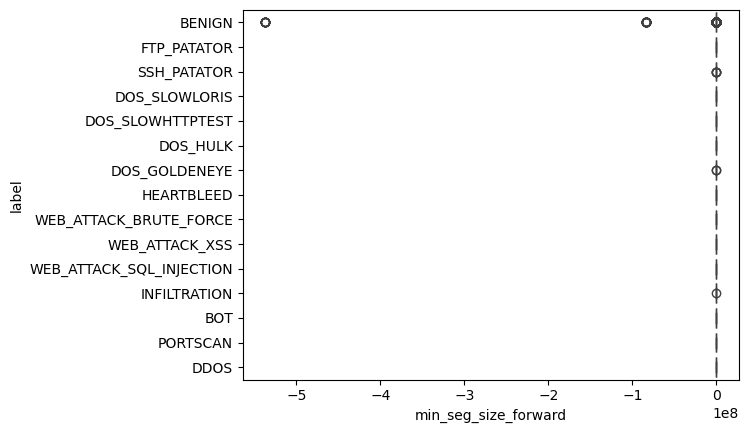

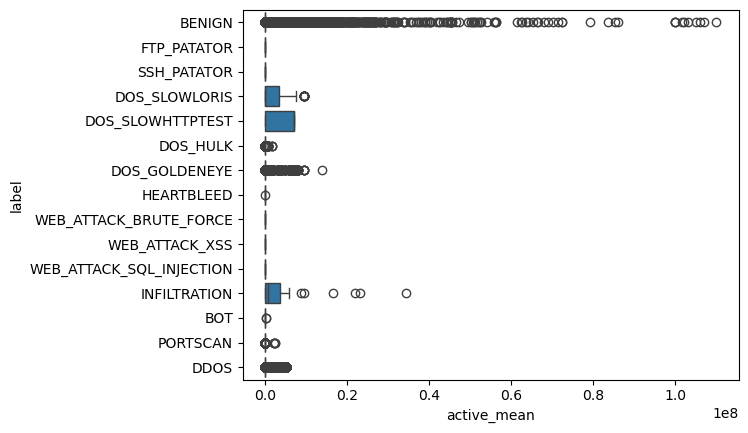

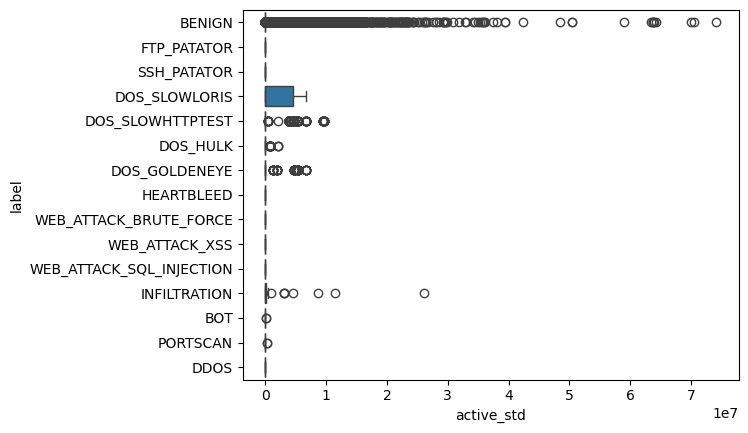

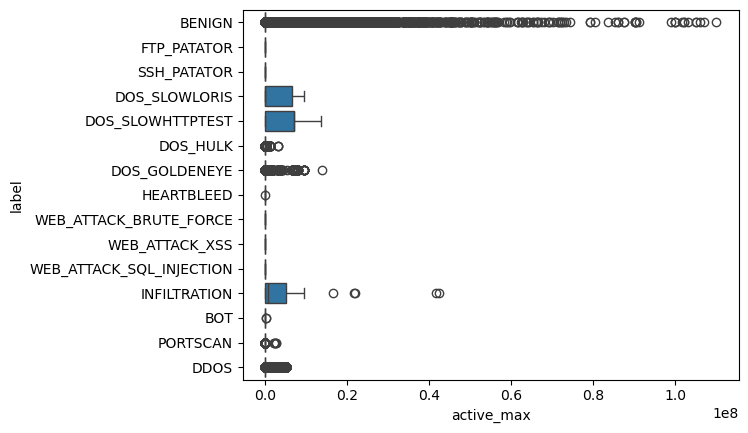

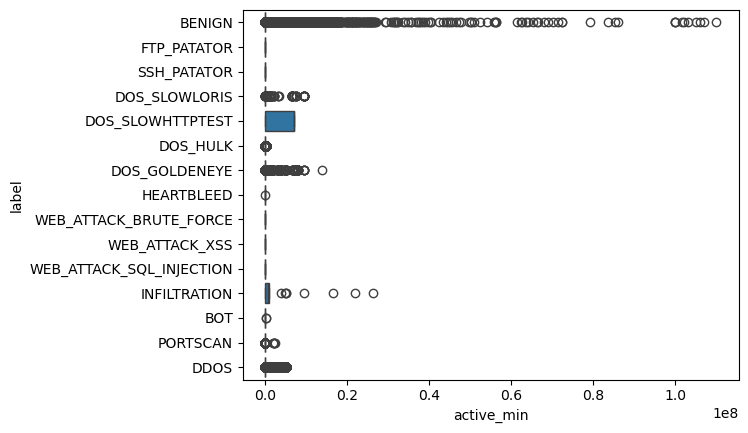

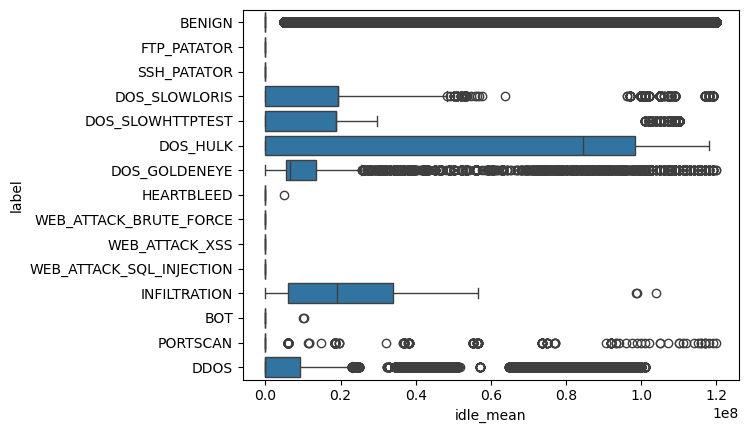

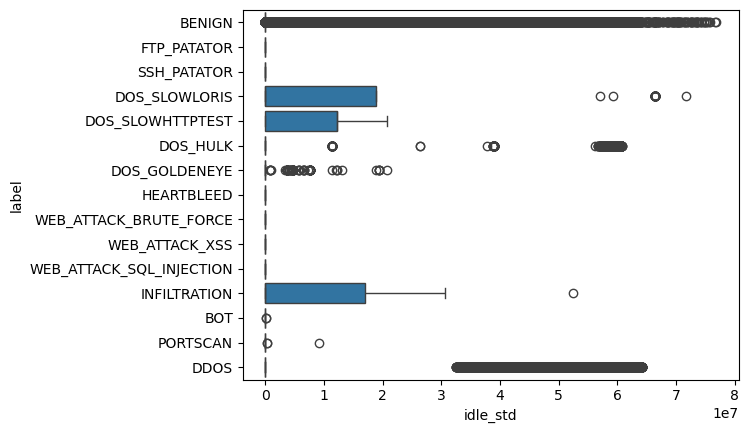

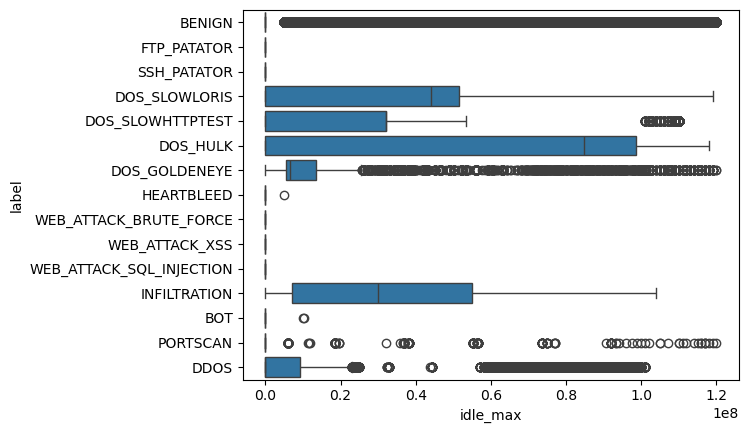

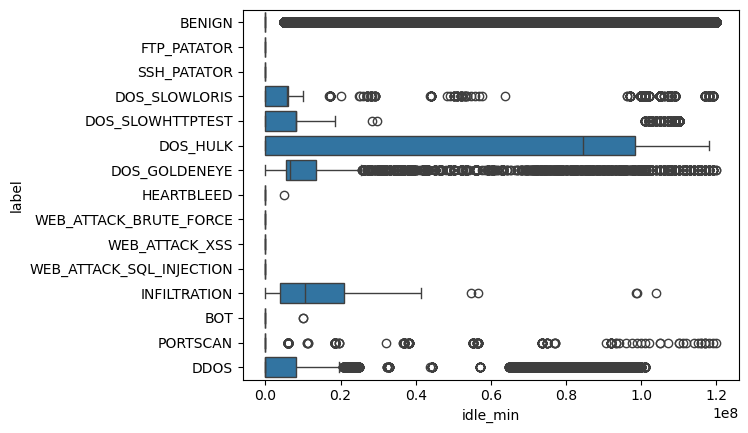

In [ ]:
# Los datos tienen bastantes outliers que pueden dificultar el análisis y entrenamiento de modelos de ML
# por ello es necesario establecer un criterio para tratar los outliers
for i in caracteristicas_numericas+caracteristicas_con_valor_maximo_infinito : 
  generateBoxplot(
    x=i,
    y="label",
    data=df,
    save_path=f"img/boxplots/boxplot_label_{i.replace("/","_").replace(".", "_")}"
  )

#### 3.2. Matriz de correlación

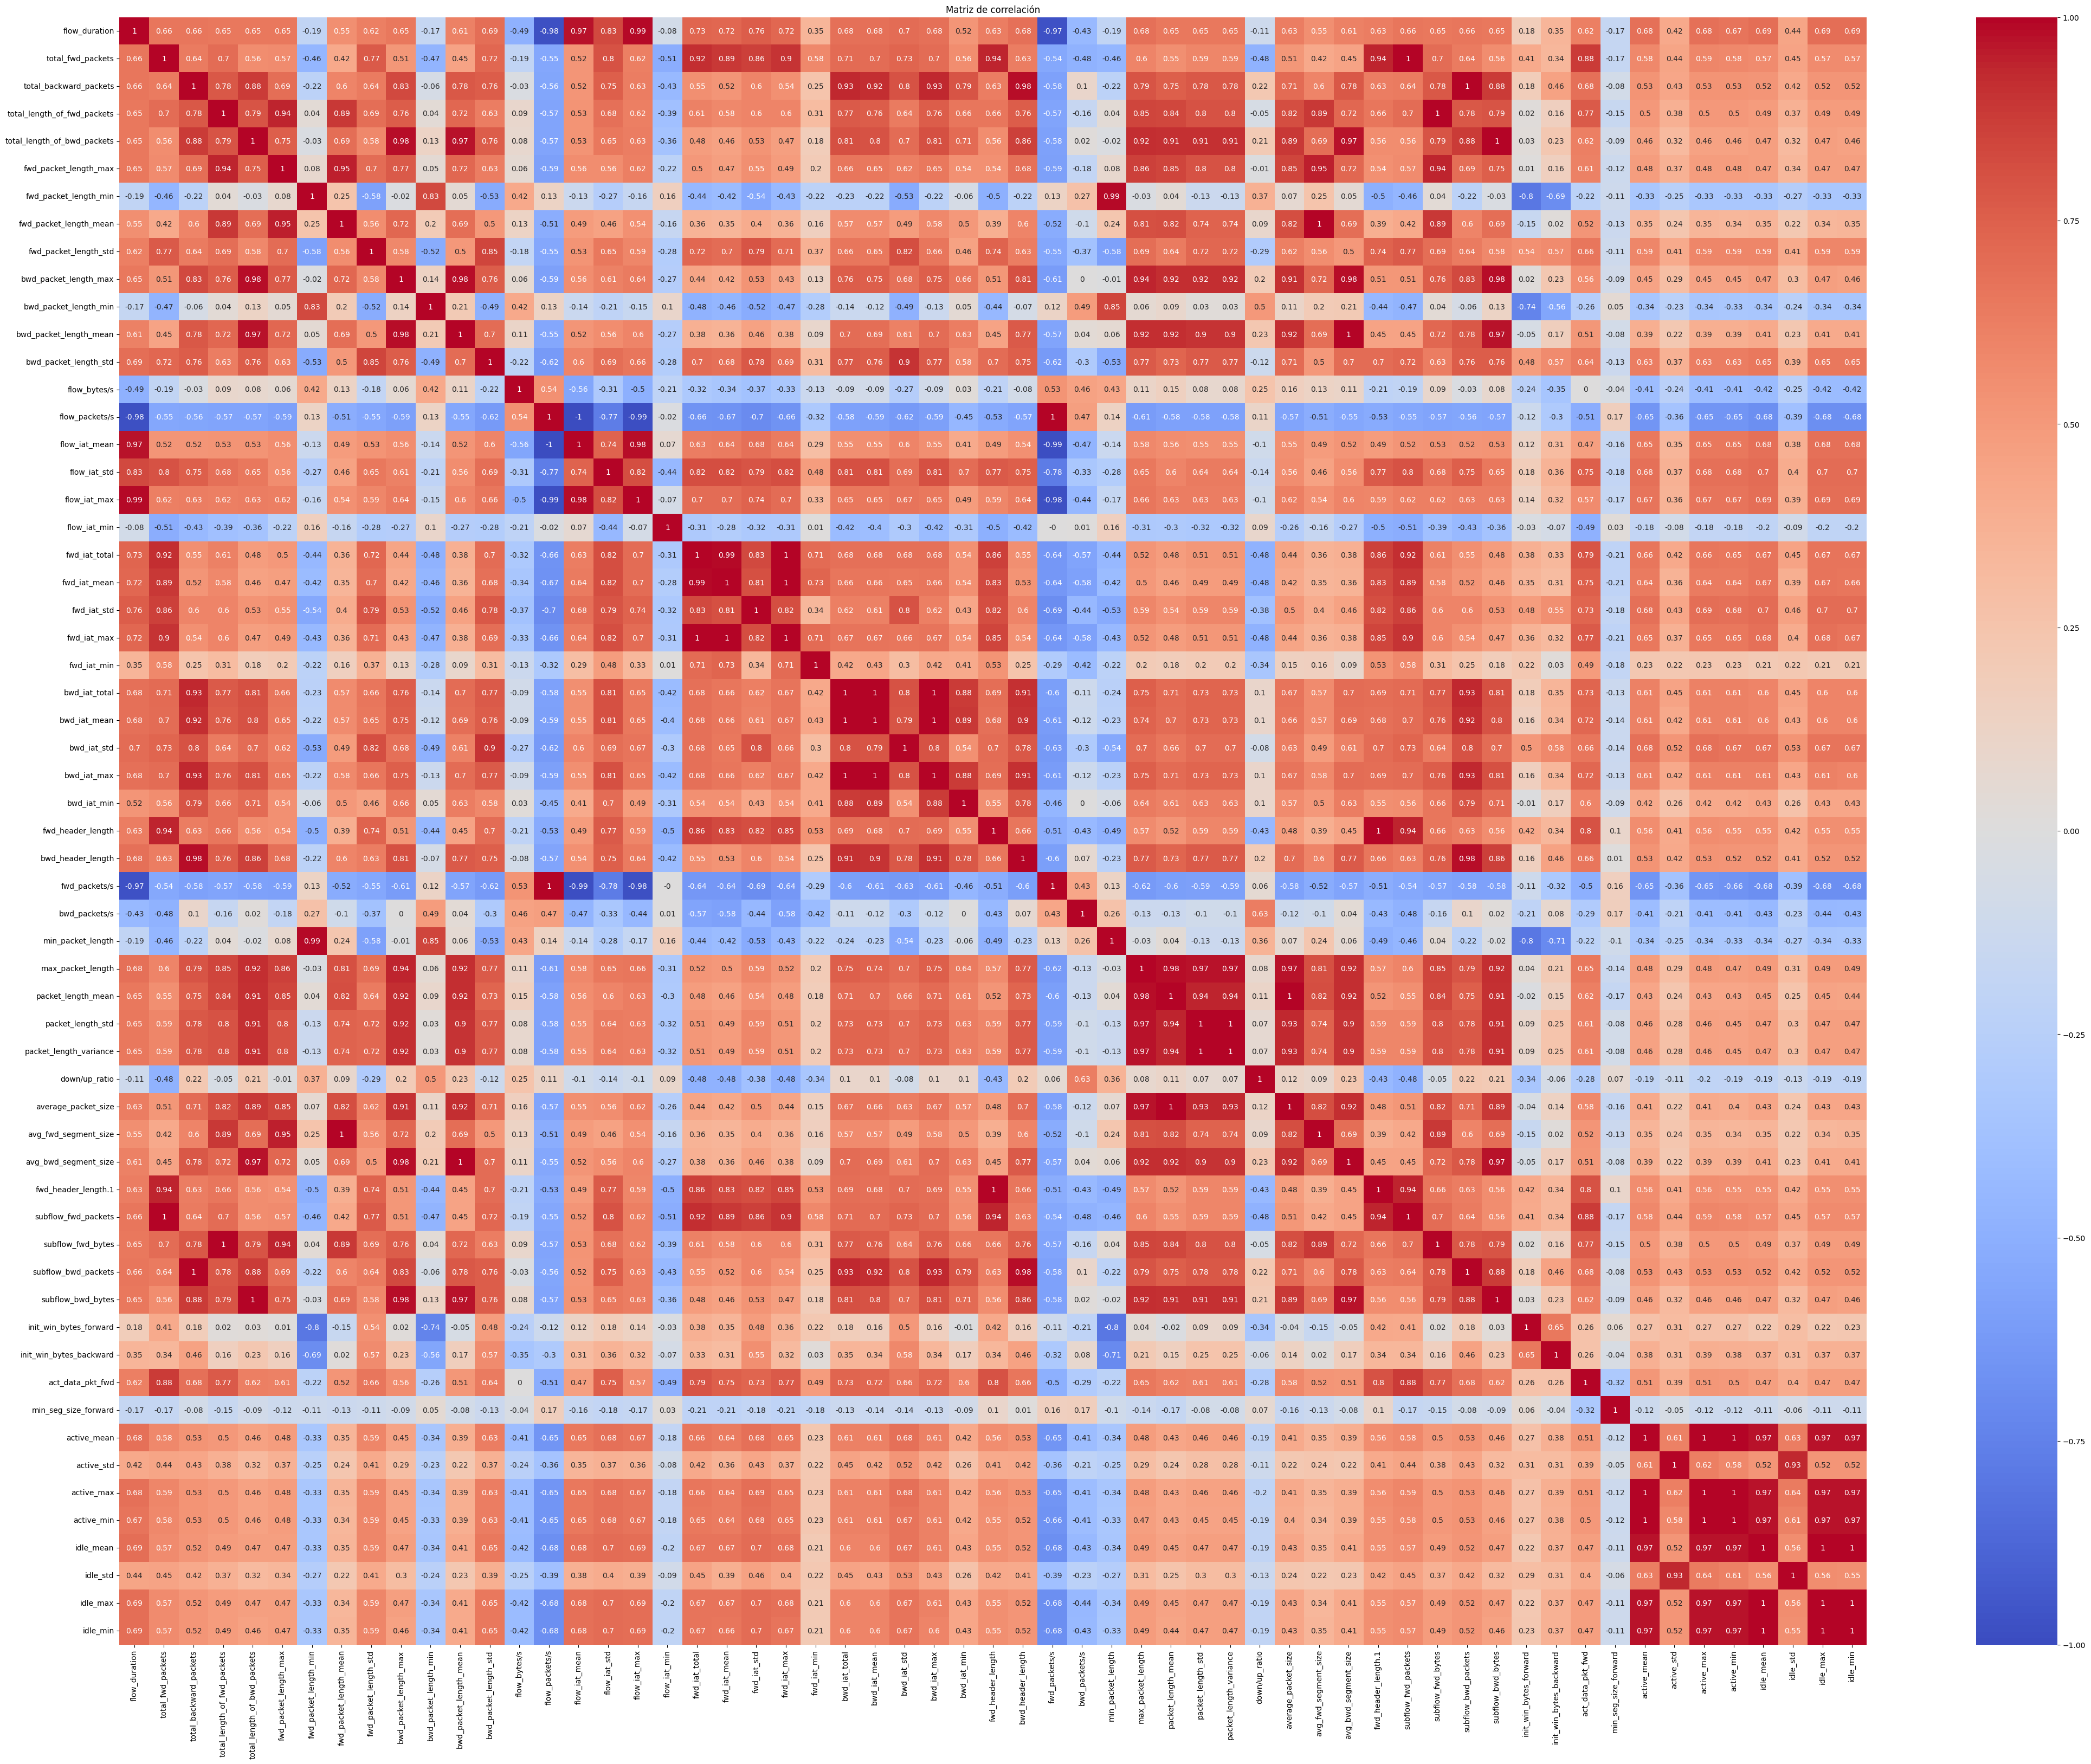

In [ ]:
# Matriz de correlación con test de Spearman sin tratamiento
generateCorrMatrix(
  data=df[caracteristicas_numericas],
  decimals=2,
  save_path="img/matriz_correlacion_pearson_no_normalizada.png",
  method="spearman"
)

## Verificación de calidad de datos

### 1. Revisión de datos nulos

In [ ]:
# La característica flow_bytes/s tiene valores nulos
df.isnull().sum()

destination_port                  0
flow_duration                     0
total_fwd_packets                 0
total_backward_packets            0
total_length_of_fwd_packets       0
total_length_of_bwd_packets       0
fwd_packet_length_max             0
fwd_packet_length_min             0
fwd_packet_length_mean            0
fwd_packet_length_std             0
bwd_packet_length_max             0
bwd_packet_length_min             0
bwd_packet_length_mean            0
bwd_packet_length_std             0
flow_bytes/s                   1358
flow_packets/s                    0
flow_iat_mean                     0
flow_iat_std                      0
flow_iat_max                      0
flow_iat_min                      0
fwd_iat_total                     0
fwd_iat_mean                      0
fwd_iat_std                       0
fwd_iat_max                       0
fwd_iat_min                       0
bwd_iat_total                     0
bwd_iat_mean                      0
bwd_iat_std                 

### 2. Revisión de datos infinitos

In [ ]:
# Las características flow_bytes/s y flow_packets/s tienen valores infinitos
for i in caracteristicas_numericas + caracteristicas_con_valor_maximo_infinito : 
  cant_inf = df[np.isinf(df[i])].shape[0]
  print(f"Característica: {i} - cant. inf. {cant_inf}")

Característica: flow_duration - cant. inf. 0
Característica: total_fwd_packets - cant. inf. 0
Característica: total_backward_packets - cant. inf. 0
Característica: total_length_of_fwd_packets - cant. inf. 0
Característica: total_length_of_bwd_packets - cant. inf. 0
Característica: fwd_packet_length_max - cant. inf. 0
Característica: fwd_packet_length_min - cant. inf. 0
Característica: fwd_packet_length_mean - cant. inf. 0
Característica: fwd_packet_length_std - cant. inf. 0
Característica: bwd_packet_length_max - cant. inf. 0
Característica: bwd_packet_length_min - cant. inf. 0
Característica: bwd_packet_length_mean - cant. inf. 0
Característica: bwd_packet_length_std - cant. inf. 0
Característica: flow_iat_mean - cant. inf. 0
Característica: flow_iat_std - cant. inf. 0
Característica: flow_iat_max - cant. inf. 0
Característica: flow_iat_min - cant. inf. 0
Característica: fwd_iat_total - cant. inf. 0
Característica: fwd_iat_mean - cant. inf. 0
Característica: fwd_iat_std - cant. inf. 0

### 3. Hipótesis

#### 3.1. Correlación entre flow_packets/s y fwd_packets/s

In [35]:
# Verificación de correlación entre valores de las columnas flow_packets/s, fwd_packets/s y bwd_packets/s
# Dentro de estos datos están los valores infinitos
df_corr_flow_packets_s = pd.DataFrame(
  np.isclose(df["fwd_packets/s"] + df["bwd_packets/s"], df["flow_packets/s"]),
  columns=["corr"]
)

df_corr_flow_packets_s["flow_packets/s_resto"] = df[~df_corr_flow_packets_s["corr"]]["flow_packets/s"] - df[~df_corr_flow_packets_s["corr"]]["fwd_packets/s"] - df[~df_corr_flow_packets_s["corr"]]["bwd_packets/s"]
flow_packets_s_resto_list = df_corr_flow_packets_s["flow_packets/s_resto"].unique() 

print(df_corr_flow_packets_s["corr"].value_counts())
print("\nDiferencia entre valores de columnas:")
[ print(i) for i in flow_packets_s_resto_list ]

corr
True     2827761
False       2982
Name: count, dtype: int64

Diferencia entre valores de columnas:
nan
inf
-2000000.0
-500000.0
-1000000.0
-166666.6667
-153846.1538


[None, None, None, None, None, None, None]